In [2]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ---- -------------------------------- 41.0/314.6 kB 653.6 kB/s eta 0:00:01
     ----------------- -------------------- 143.4/314.6 kB 1.2 MB/s eta 0:00:01
     ----------------------------- -------- 245.8/314.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Gettin

In [3]:
import yfinance as yf

# Fetching Apple stock data
apple_stock = yf.download('AAPL', start='2014-01-01', end='2024-01-01')

print(apple_stock.head())  # Display the first few rows of the data


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296658  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916716  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008966  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887325  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994276  258529600


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


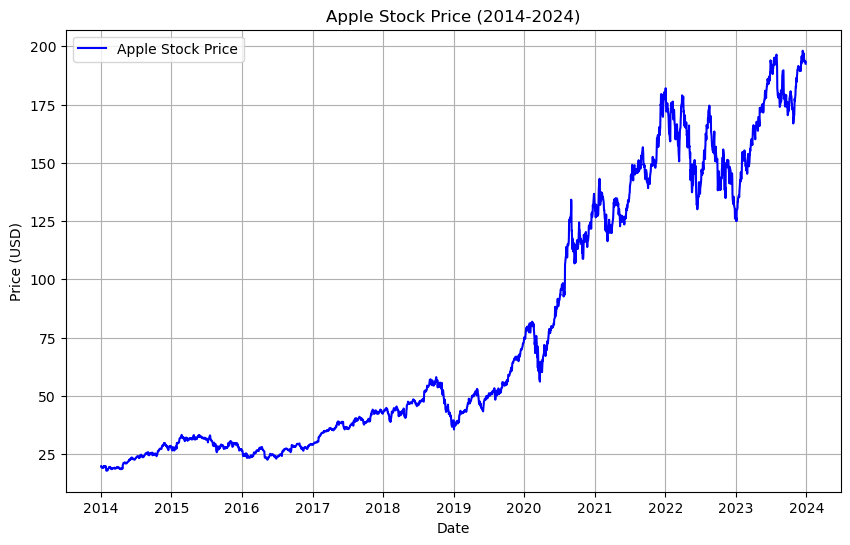

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching Apple stock data
apple_stock = yf.download('AAPL', start='2014-01-01', end='2024-01-01')

# Plotting the Close price
plt.figure(figsize=(10, 6))
plt.plot(apple_stock.index, apple_stock['Close'], label='Apple Stock Price', color='blue')
plt.title('Apple Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


Training R-squared score: 0.9990408967061145
Testing R-squared score: 0.9990870014821768


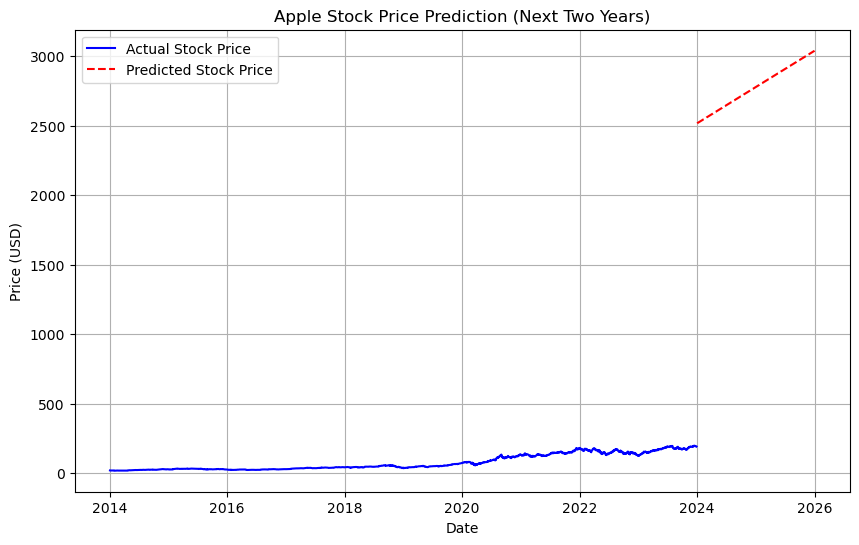

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching Apple stock data
apple_stock = yf.download('AAPL', start='2014-01-01', end='2024-01-01')

# Feature engineering: Using only 'Close' price as the feature
X = apple_stock[['Close']].values

# Target variable: Next day's 'Close' price shifted by 1 day
y = apple_stock['Close'].shift(-1).values

# Remove NaN values
X = X[:-1]
y = y[:-1]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

# Generate dates for the next two years
next_two_years_dates = pd.date_range(start='2024-01-02', end='2026-01-01', freq='B')

# Convert dates to ordinal values or use index
next_two_years_dates_numeric = np.arange(len(apple_stock), len(apple_stock) + len(next_two_years_dates)).reshape(-1, 1)

# Make predictions for the next two years
next_two_years_predictions = model.predict(next_two_years_dates_numeric)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(apple_stock.index, apple_stock['Close'], label='Actual Stock Price', color='blue')
plt.plot(next_two_years_dates, next_two_years_predictions, label='Predicted Stock Price', color='red', linestyle='--')
plt.title('Apple Stock Price Prediction (Next Two Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
